In [1]:
import sys
sys.path.append('/../QmeQ/qmeq/')
#sys.path.append('../qmeq/')
import qmeq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
#--SETUP: ---------------------------------------------------------------------------------
eLow, eHigh = -6000, 6000
epsilons_L = np.linspace(eLow, eHigh,20)
epsilons_R = np.linspace(eLow, eHigh, 20)
omega = 0.4
u_intra = 2000
u_inter = 1000
V_B = 100
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.5
gammaR = gammaL
tL = np.sqrt(gammaL/np.pi/2)
tR = np.sqrt(gammaR/np.pi/2)
T_L = 100
T_R = T_L
n = 4
nleads = 4

U = {(0,1,1,0):u_intra, (2,3,3,2):u_intra, (0,2,2,0):u_inter, (0,3,3,0):u_inter, (1,2,2,1):u_inter, (1,3,3,1):u_inter } 
mulst = {0:mu_L, 1:mu_L, 2:mu_R, 3:mu_R}
tlst = {0:T_L, 1:T_L, 2:T_R, 3:T_R}

In [3]:
#Från series till parallel!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
I = np.zeros((len(epsilons_L),len(epsilons_R)))
Prob = np.zeros((n+1, len(epsilons_L), len(epsilons_R)))

system = qmeq.Builder(nsingle=n, coulomb=U, nleads=nleads,
                        mulst=mulst, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')


for L_idx, eL in enumerate(epsilons_L):
    for R_idx, eR in enumerate(epsilons_R):
        system.change(hsingle={(0,0):eL, (1,1):eL, (2,2):eR, (3,3):eR, (0,2):omega, (1,3):omega})
        system.solve()
        I[L_idx, R_idx] = system.current_noise[0] + system.current_noise[1]
        rho = system.phi0
        Prob[0, L_idx, R_idx] = rho[0] 
        Prob[1, L_idx, R_idx] = rho[1] + rho[2] + rho[3] + rho[4]
        for k in range(6):
            Prob[2, L_idx, R_idx] += rho[5+k]
        Prob[3, L_idx, R_idx] = rho[11] + rho[12] + rho[13] + rho[14]
        Prob[4, L_idx, R_idx] = rho[15]


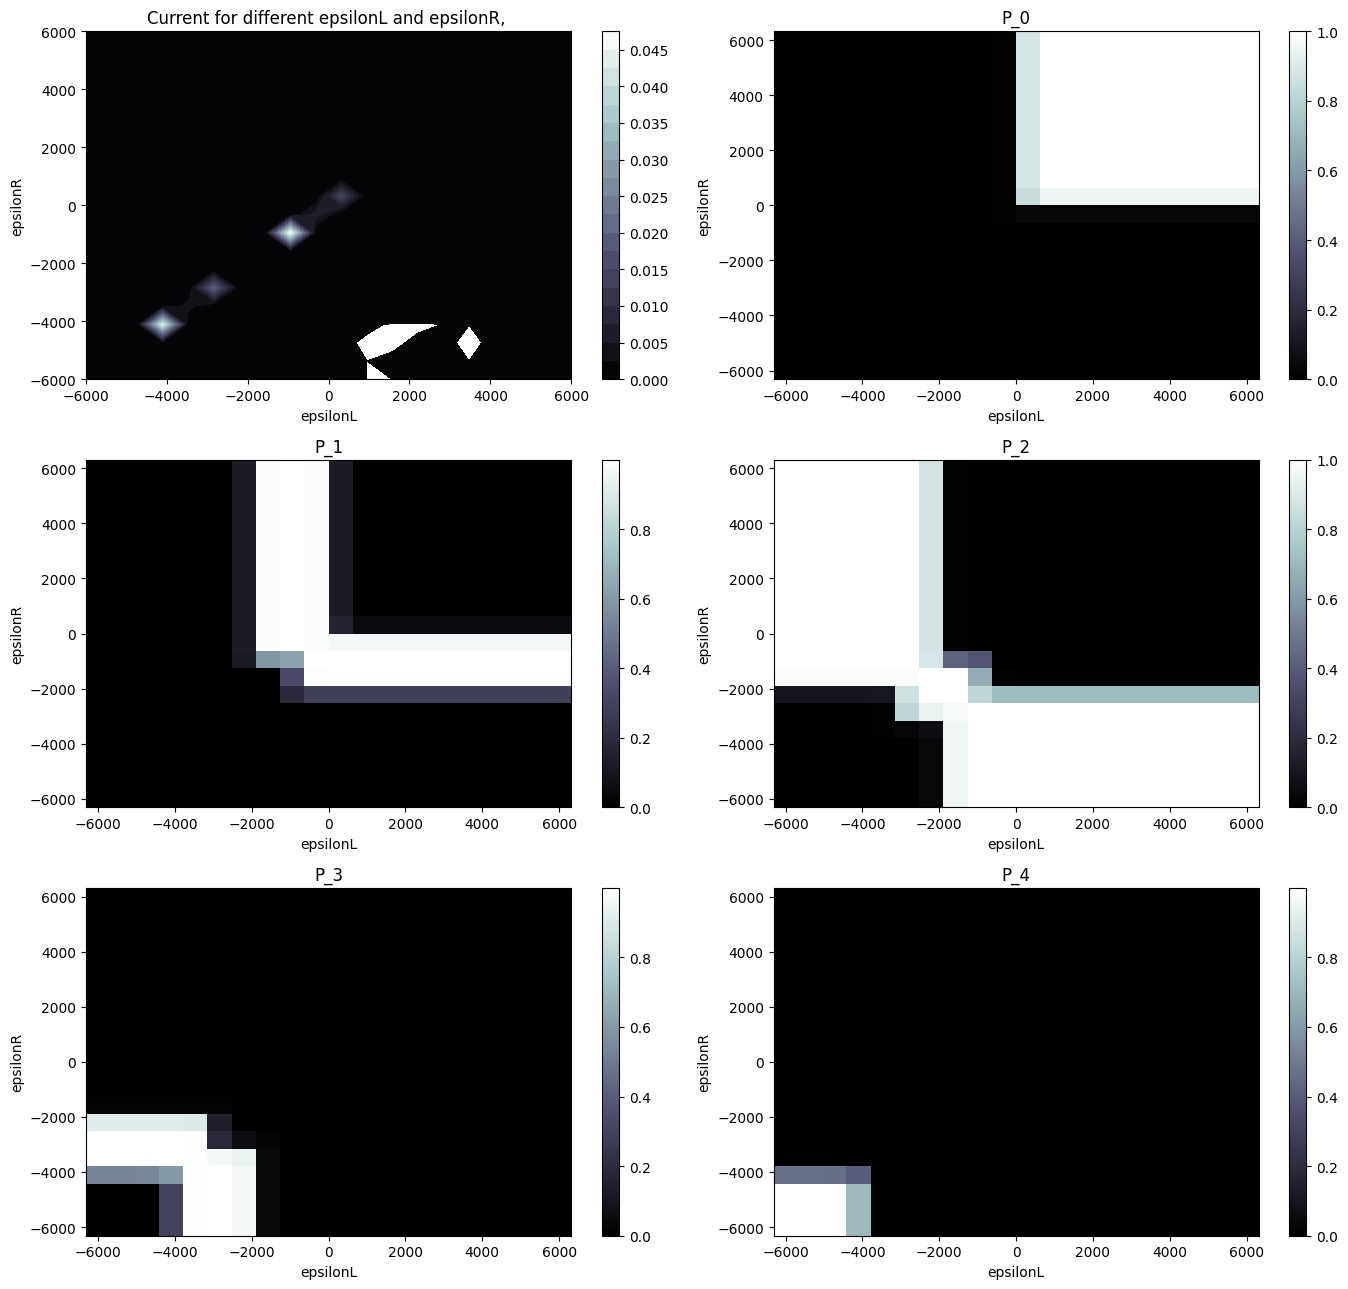

"\nplt.figure(figsize=(8, 6))\ncontour = plt.contourf(epsilonL, epsilonR, I, 20, cmap='binary')  # Adjust number of contour levels as needed\nplt.colorbar(contour)\nplt.xlabel('epsilonL')\nplt.ylabel('epsilonR')\nplt.title('Current for different epsilonL and epsilonR, ')\nplt.show()\n"

In [4]:
# Create a mesh grid
epsilonL, epsilonR = np.meshgrid(epsilons_L, epsilons_R)

fig, axes = plt.subplots(3, 2, figsize=(14, 13)) 

contour = axes[0,0].contourf(epsilonL, epsilonR, I, 20, cmap='bone')  # Adjust number of contour levels as needed
fig.colorbar(contour, ax=axes[0,0])
axes[0,0].set_xlabel('epsilonL')
axes[0,0].set_ylabel('epsilonR')
axes[0,0].set_title('Current for different epsilonL and epsilonR, ')

contour = axes[0,1].pcolormesh(epsilonL, epsilonR, Prob[0], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[0,1])
axes[0,1].set_title('P_0')
axes[0,1].set_xlabel('epsilonL')
axes[0,1].set_ylabel('epsilonR')

contour = axes[1,0].pcolormesh(epsilonL, epsilonR, Prob[1], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[1,0])
axes[1,0].set_xlabel('epsilonL')
axes[1,0].set_ylabel('epsilonR')
axes[1,0].set_title('P_1')

contour = axes[1,1].pcolormesh(epsilonL, epsilonR, Prob[2], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[1,1])
axes[1,1].set_title('P_2')
axes[1,1].set_xlabel('epsilonL')
axes[1,1].set_ylabel('epsilonR')

contour = axes[2,0].pcolormesh(epsilonL, epsilonR, Prob[3], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[2,0])
axes[2,0].set_xlabel('epsilonL')
axes[2,0].set_ylabel('epsilonR')
axes[2,0].set_title('P_3')

contour = axes[2,1].pcolormesh(epsilonL, epsilonR, Prob[4], shading='auto', cmap='bone')
fig.colorbar(contour, ax=axes[2,1])
axes[2,1].set_title('P_4')
axes[2,1].set_xlabel('epsilonL')
axes[2,1].set_ylabel('epsilonR')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


'''
plt.figure(figsize=(8, 6))
contour = plt.contourf(epsilonL, epsilonR, I, 20, cmap='binary')  # Adjust number of contour levels as needed
plt.colorbar(contour)
plt.xlabel('epsilonL')
plt.ylabel('epsilonR')
plt.title('Current for different epsilonL and epsilonR, ')
plt.show()
'''

In [5]:
#COLOUMB DIAMONDS


epsilons = np.linspace(-6000, 6000, 10)
V_B = np.linspace(-100,100, 10)
omega = 1000

I = np.zeros((len(epsilons),len(V_B)))

system = qmeq.Builder(nsingle=n, coulomb=U, nleads=nleads,
                        mulst=mulst, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')


for e_idx, eps in enumerate(epsilons):
    for v_idx, v in enumerate(V_B):
        system.change(hsingle={(0,0):eps, (1,1):eps, (2,2):eps, (3,3):eps, (0,2):omega, (1,3):omega})
        system.solve()
        I[e_idx, v_idx] = system.current_noise[0] + system.current_noise[1]

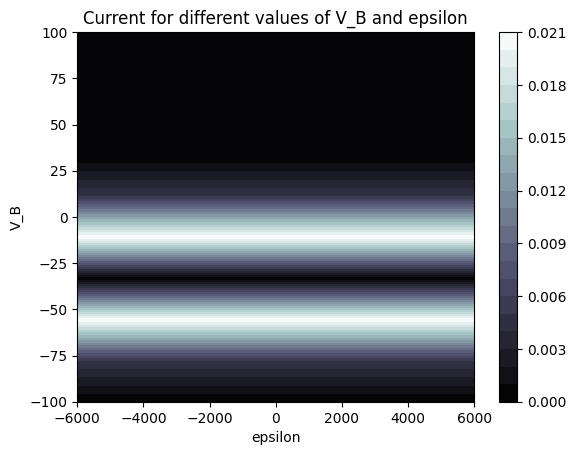

In [6]:
eps_mesh, V_B_mesh = np.meshgrid(epsilons, V_B)
contour = plt.contourf(eps_mesh, V_B_mesh, I, 20, cmap='bone')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('V_B')
plt.title('Current for different values of V_B and epsilon')
plt.show()

In [7]:
#Calculations of P, efficiency, sigma and TUR
if T_L < T_R:
    T_COLD = T_L
    T_HOT = T_R
elif T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L
elif T_L == T_R:
    raise SystemExit("Not a heat engine (T_L = T_R) so cell was shut down")

P = I*V_B
eff_carnot = 1-(T_COLD/T_HOT)
eff = P/J_QH
sigma = P*(1/T_COLD)*(eff_carnot-eff)/eff
TUR = I_var*sigma/(I**2)

SystemExit: Not a heat engine (T_L = T_R) so cell was shut down

c:\temp_prog\venv\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


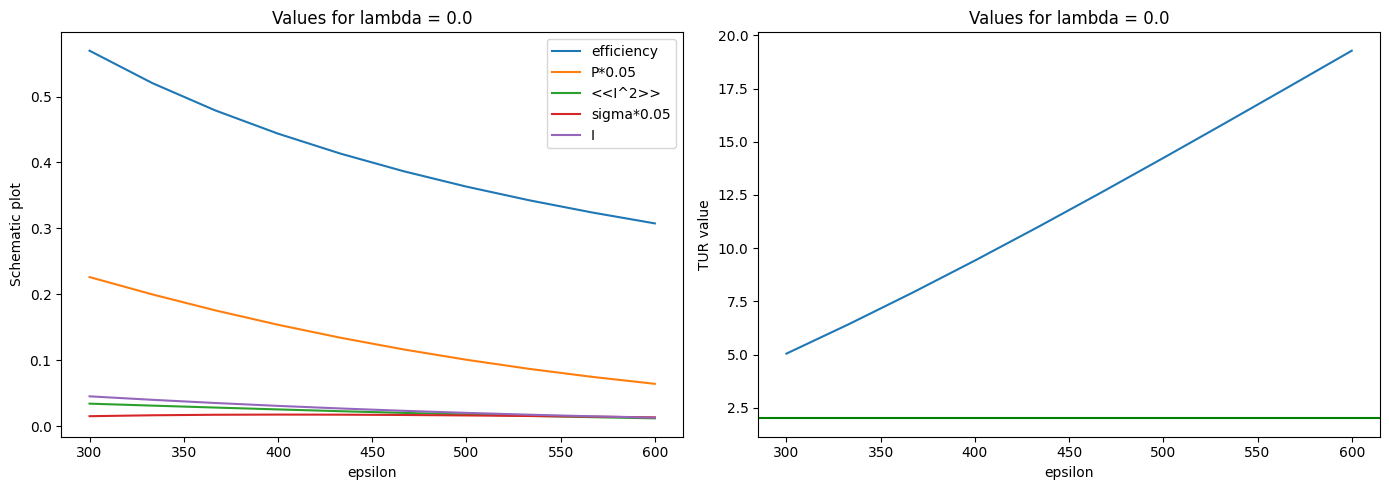

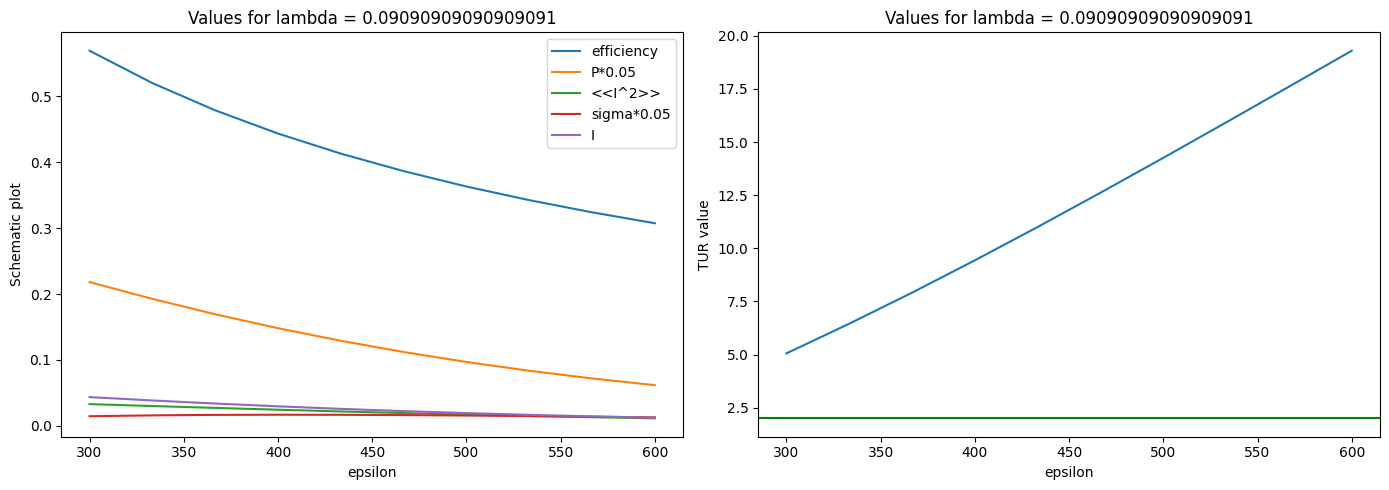

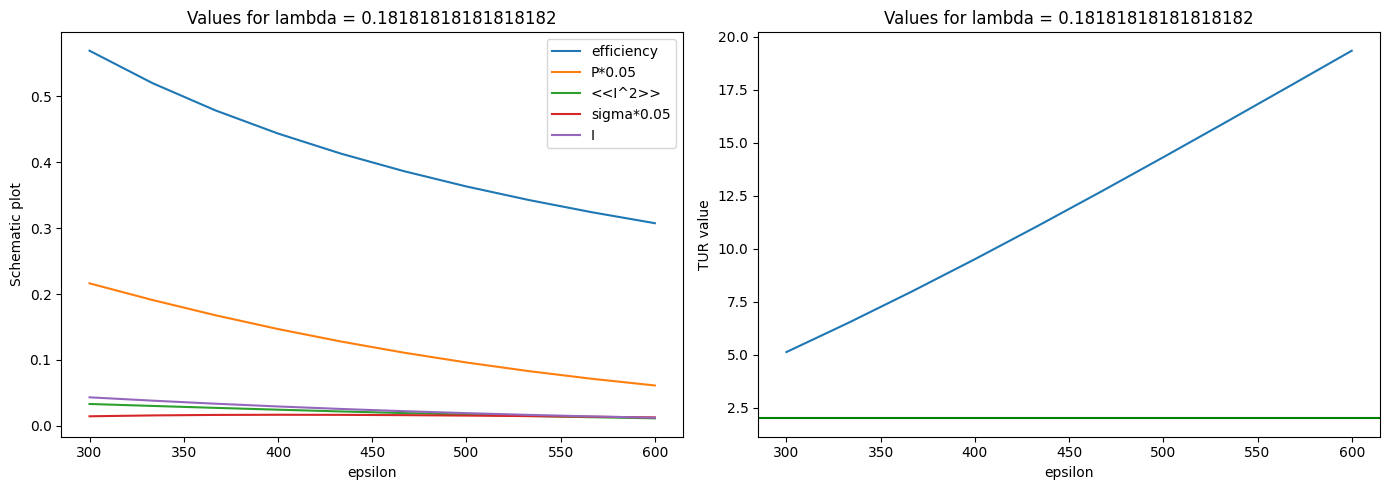

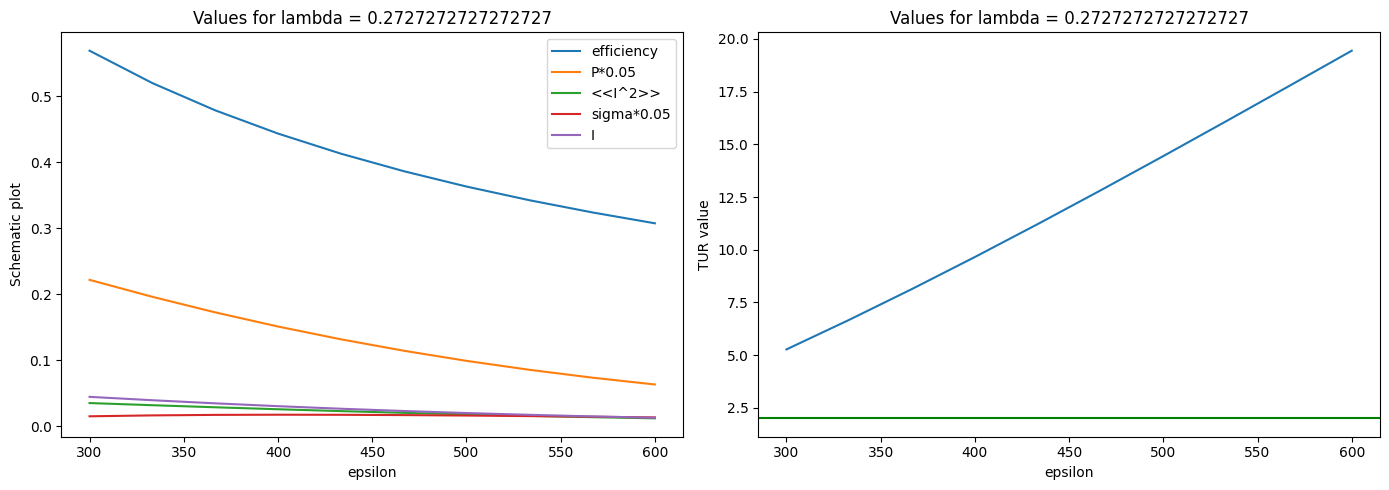

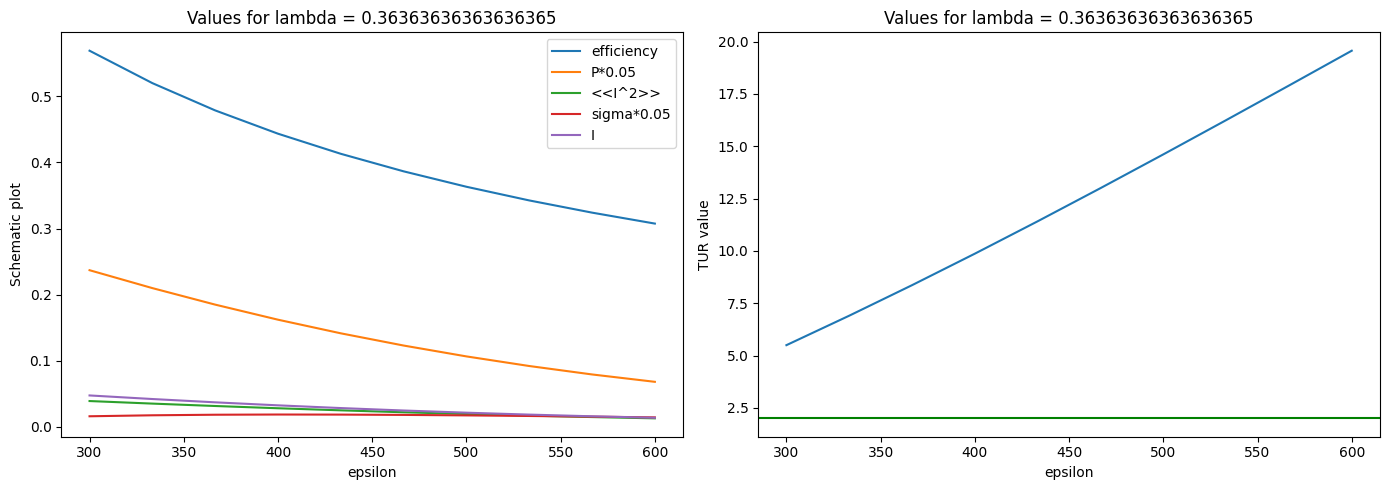

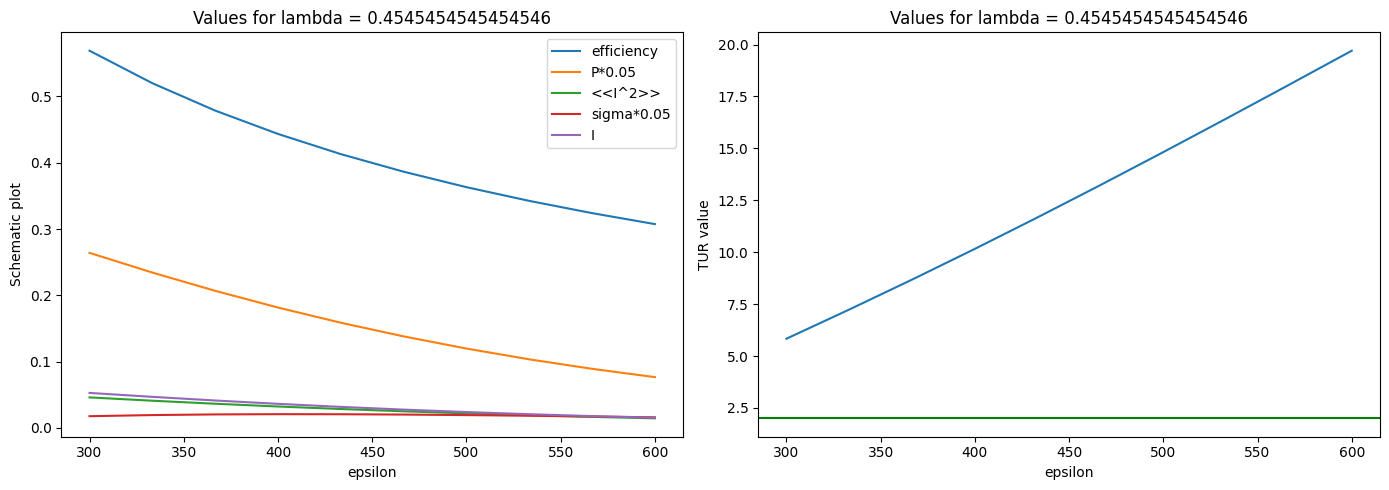

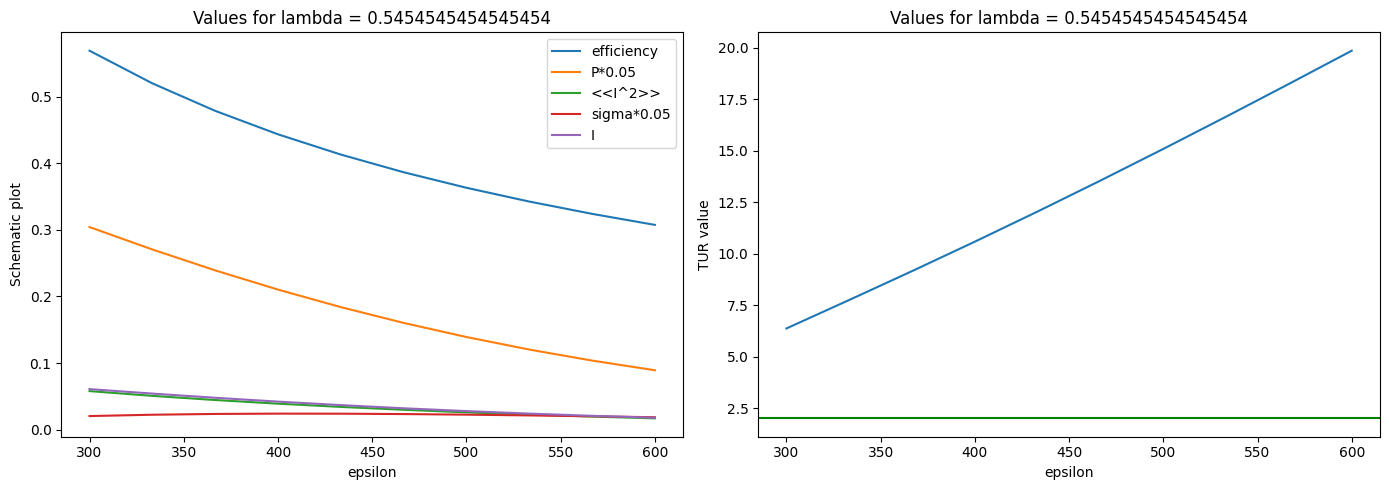

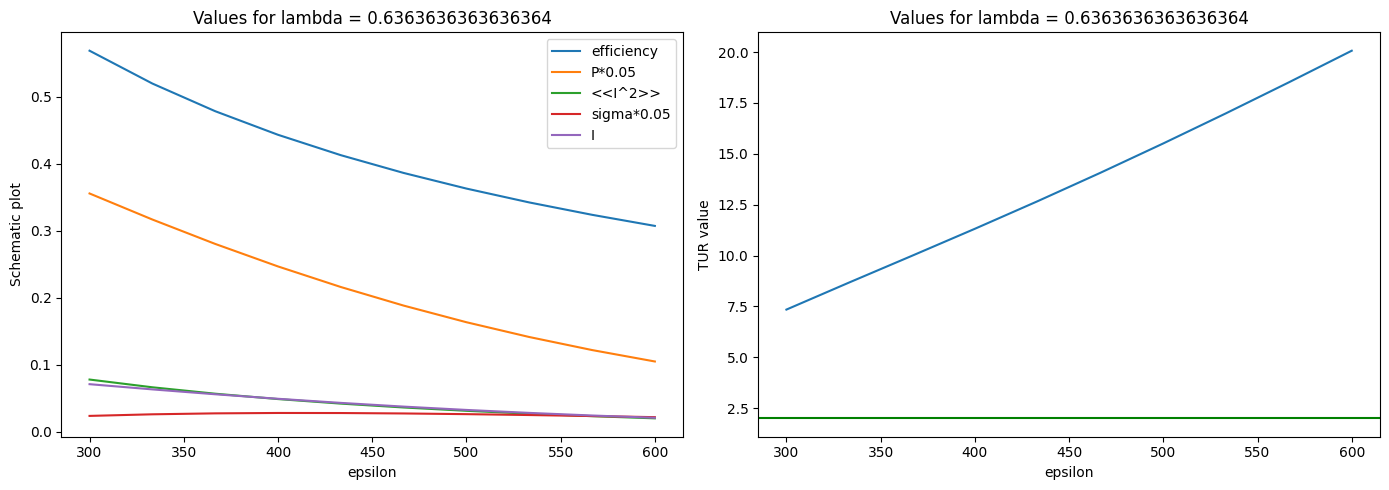

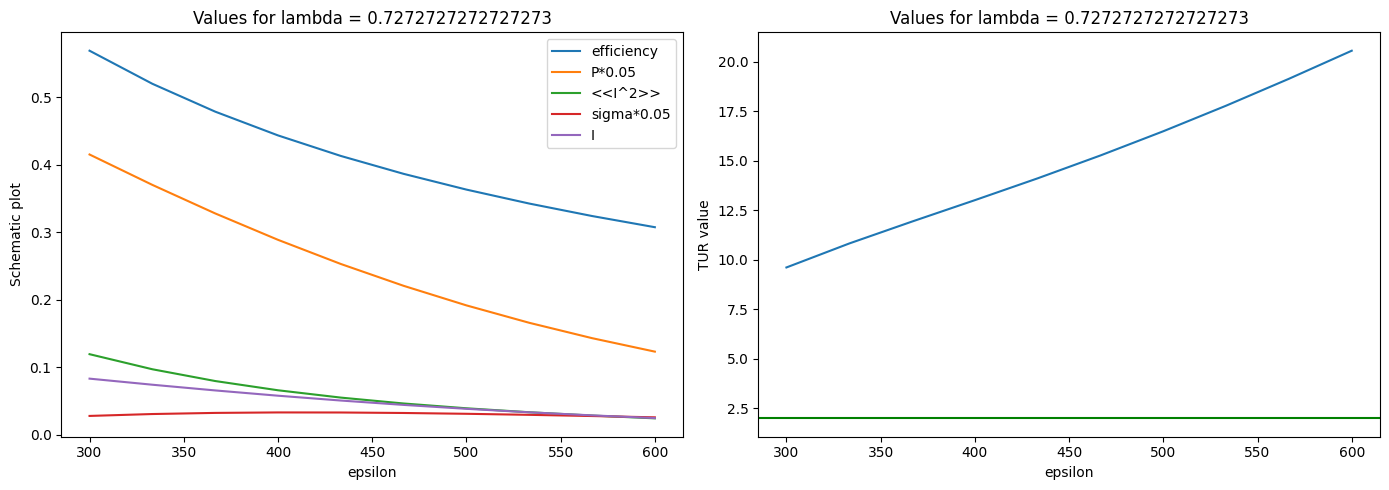

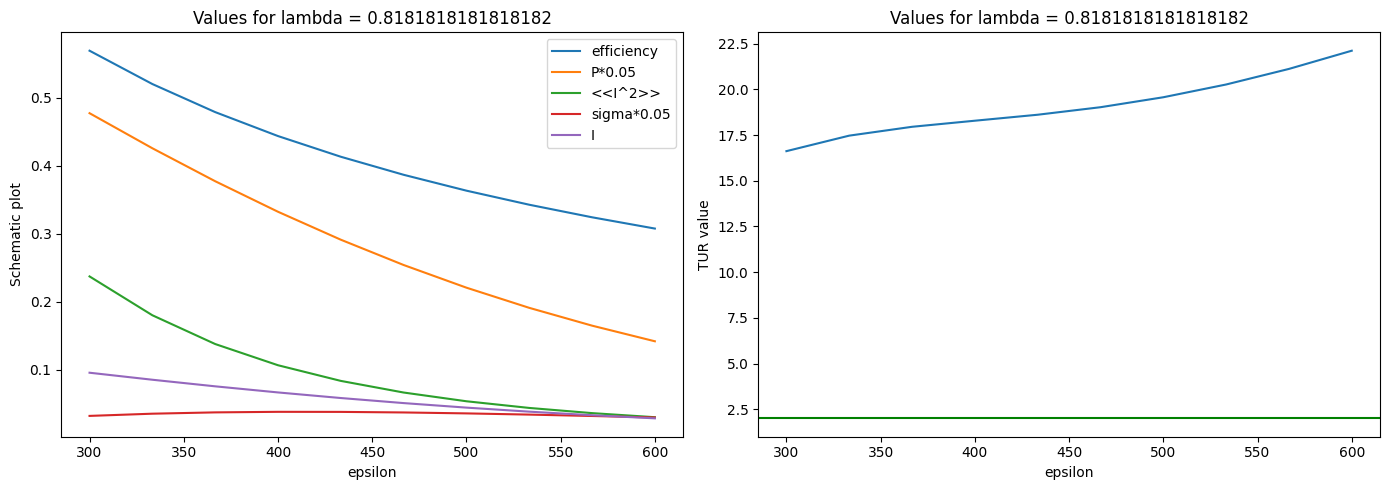

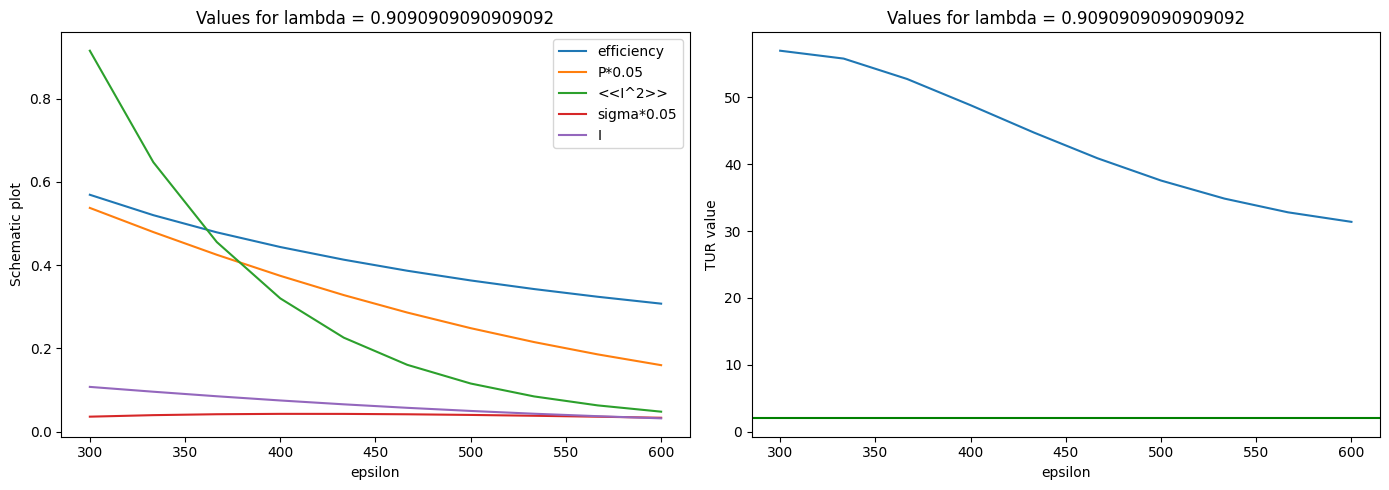

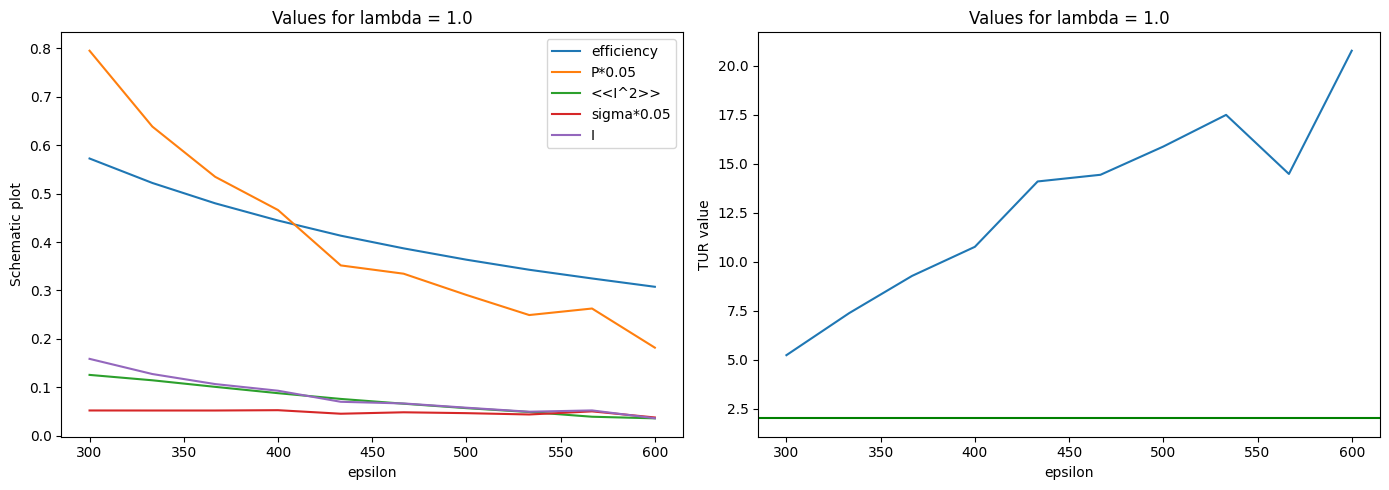

In [ ]:
#---------plotting----------------------------------
for idx, lmda in enumerate(lamdas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

    ax1.plot(epsilons, eff[idx], label='efficiency')
    ax1.plot(epsilons, 0.05*P[idx], label='P*0.05')
    ax1.plot(epsilons, I_var[idx], label='<<I^2>>')
    ax1.plot(epsilons, 0.05*sigma[idx], label='sigma*0.05')
    ax1.plot(epsilons, I[idx], label='I')
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('Schematic plot')
    ax1.set_title(f'Values for lambda = {lmda}')
    ax1.legend()

    ax2.plot(epsilons, TUR[idx], label='TUR')
    ax2.set_title(f'Values for lambda = {lmda}')
    ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('TUR value')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

I: (12, 10)
meshgrid:
epsilon: (12, 10)
lamda: (12, 10)


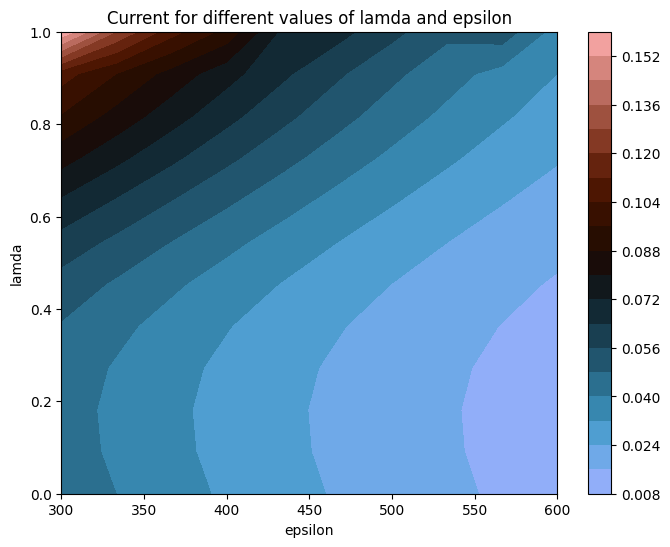

In [ ]:
# Plotting of the cummulants

# Create a mesh grid
epsilon, lamda = np.meshgrid(epsilons, lamdas)
print('I:',I.shape)
print('meshgrid:')
print('epsilon:', epsilon.shape)
print('lamda:', lamda.shape)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, lamda, I, 20, cmap='berlin')  # Adjust number of contour levels as needed
#contour = plt.pcolormesh(epsilon, lamda, I, shading='auto', cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('lamda')
plt.title('Current for different values of lamda and epsilon')
plt.show()

In [ ]:
eps = 500
#double QD in series (with spin) ==============================================================================================================
h = {(0,0):eps, (1,1):eps, (2,2):eps, (3,3):eps, (0,2):omega, (1,3):omega} # <-------/// Här skiljer dom sig ! ///----
tleads = {(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR} # <------/// Här skiljer dom sig ! ///----

system_parallell = qmeq.Builder(nsingle=n, hsingle=h, coulomb=U, nleads=nleads,
                         mulst=mulst, tlst=tlst, tleads=tleads, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')
system_parallell.solve()
print('IN SERIES: Standard current:',system_parallell.current)
print('IN SERIES: Counting currents and noise at the left lead (Lindblad):',system_parallell.current_noise)

#double QD in parallel (with spin) ===========================================================================================================
h = {(0,0):eps, (1,1):eps, (2,2):eps, (3,3):eps} # <------/// Här skiljer dom sig ! ///-----
tleads = {(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR, (0,2):tL, (1,3):tL, (2,0):tR, (3,1):tR} # <-------/// Här skiljer dom sig ! ///----
#============================================================================================================================================

system_parallell = qmeq.Builder(nsingle=n, hsingle=h, coulomb=U, nleads=nleads,
                         mulst=mulst, tlst=tlst, tleads=tleads, dband=1e4, countingleads=[0,1], kerntype='pyLindblad')
system_parallell.solve()
print('IN PARALLEL: Standard current:',system_parallell.current)
print('IN PARALLEL: Counting currents and noise at the left lead (Lindblad):',system_parallell.current_noise)

IN SERIES: Standard current: [ 0.01007139  0.01007139 -0.01007139 -0.01007139]
IN SERIES: Counting currents and noise at the left lead (Lindblad): [0.02014279 0.01776022]
IN PARALLEL: Standard current: [ 0.02908214  0.02908214 -0.02908214 -0.02908214]
IN PARALLEL: Counting currents and noise at the left lead (Lindblad): [0.05816428 0.05723617]
